# SD210 Decision Tree     
## WANG Yuqing

In [1]:
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
import tparbressource as tp
from matplotlib import pyplot as plt
from math import fmod

## 1) In the regression framework, propose an other homogeneity measure.

SVM(Support Vector Machine), they are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.  

## 2)Simulate with rand_checkers a sample of size n = 448, Display 2 charts that indicate the percentage of errors as a function of the maximal depth of the tree 

In [2]:
n = 448/4
sigma = 0.1
data = tp.rand_checkers(n, n, n, n, sigma)
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, -1])
errors_gini = []
errors_entropy = []
depth_min_gini = 1
error_min_gini = 1
depth_min_entropy = 1
error_min_entropy = 1

In [3]:
for i in np.arange(1, 21):
    clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf_gini.fit(X_train, y_train)
    clf_entropy.fit(X_train, y_train)
    errors_gini.append(1-clf_gini.score(X_test, y_test))
    errors_entropy.append(1-clf_entropy.score(X_test, y_test))
    if 1-clf_gini.score(X_test, y_test) < error_min_gini:
        depth_min_gini = i
        error_min_gini = 1-clf_gini.score(X_test, y_test)
    if 1-clf_entropy.score(X_test, y_test) < error_min_entropy:
        depth_min_entropy = i
        error_min_entropy = 1-clf_entropy.score(X_test, y_test)

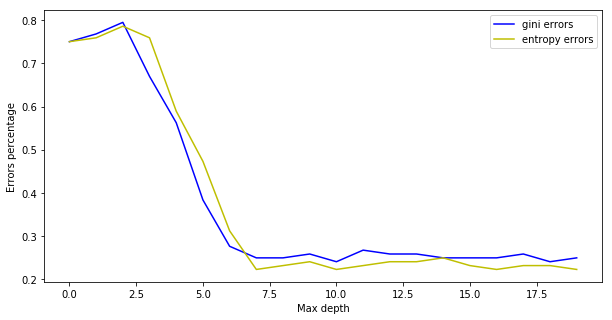

In [4]:
fig, axes = plt.subplots(1, 1, sharex = True, figsize = (10,5))
axes.plot(errors_gini, 'b', label = "gini errors")
axes.plot(errors_entropy, 'y', label = "entropy errors", )
axes.legend(loc = 'upper right')
plt.xlabel('Max depth')
plt.ylabel('Errors percentage')
plt.show()

## 3)Display the classifier obtained using the depth that minimizes the error percentage with the entropy

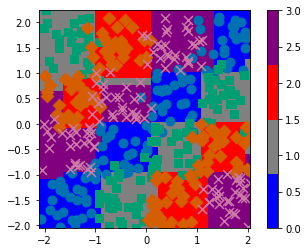

The depth that minimizes the error percentage with the entropy is 8


In [5]:
clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth_min_entropy)
clf_entropy.fit(X_train, y_train)
tp.plot_2d(data[:, :2], data[:, -1], w=None, alpha_choice=1)
tp.frontiere(clf_entropy.predict, data, step=50)
plt.show()
print "The depth that minimizes the error percentage with the entropy is "+str(depth_min_entropy)

## 4)Export a figure of the tree obtained at the previous question in the pdf format.

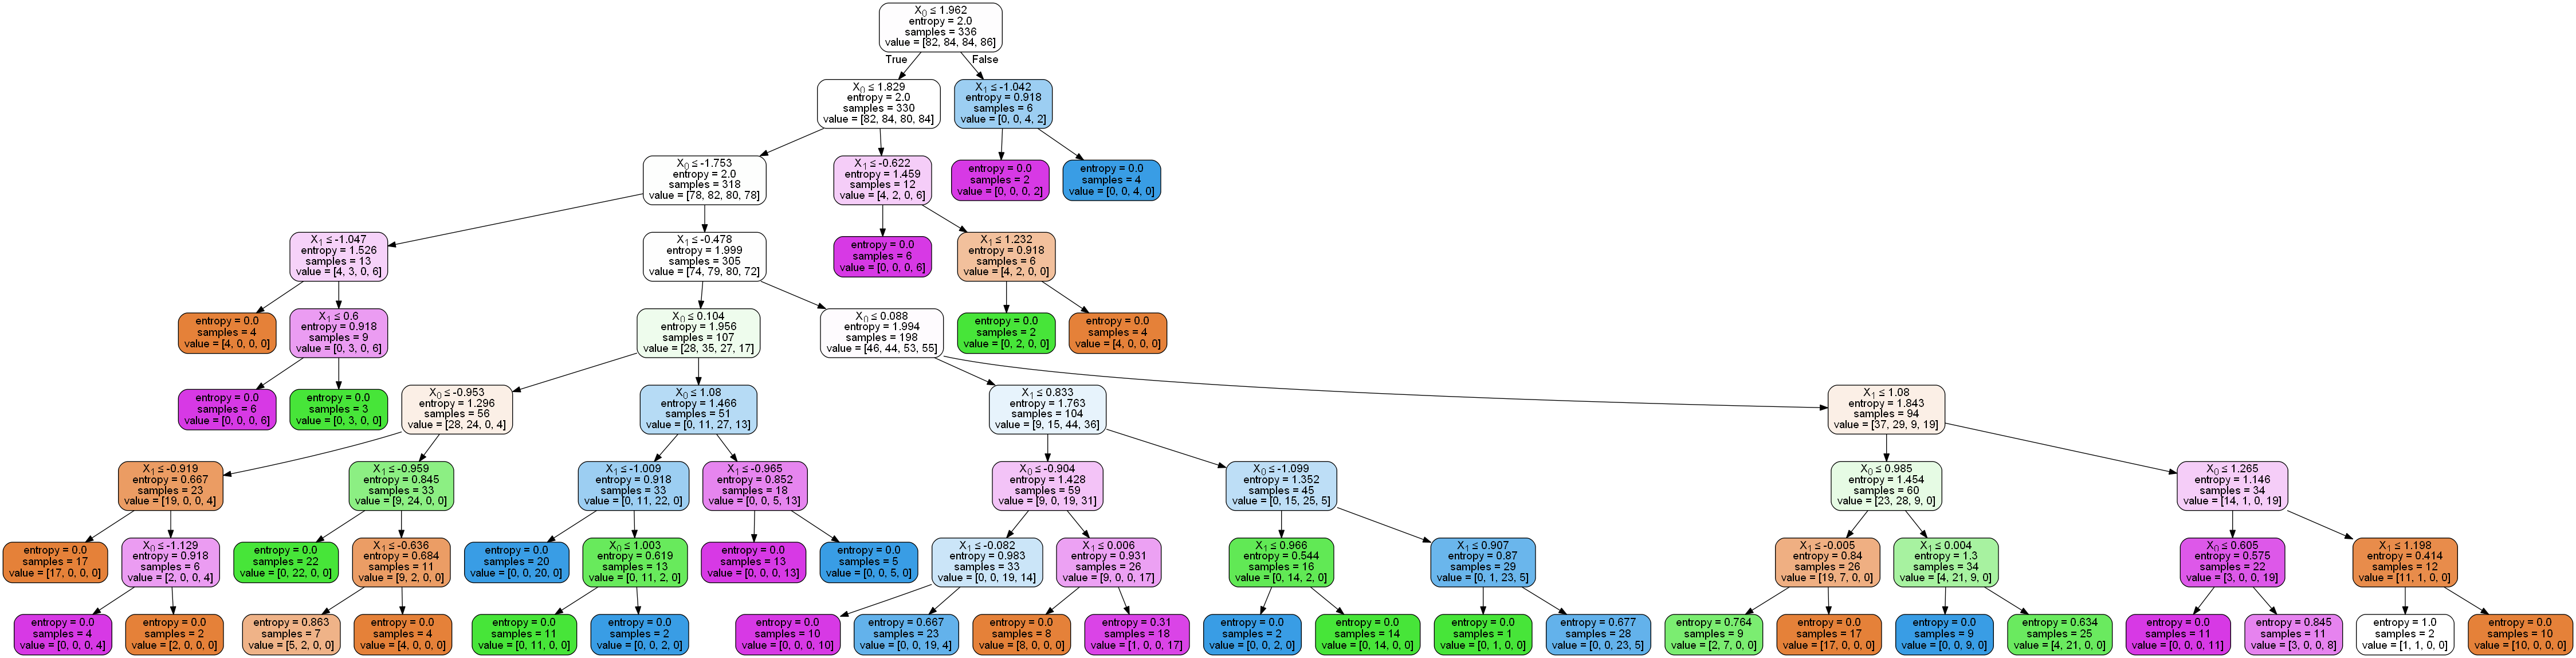

In [6]:
from IPython.display import Image
import pydotplus
import os       
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(clf_entropy, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_pdf("Decision Tree.pdf") 
Image(graph.create_png())

## 5)Create n = 160 new samples with rand_checkers. For the decision trees obtained in question 2, compute the proportion of errors on this second sample.

In [7]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth_min_gini)
clf_gini.fit(X_train, y_train)
n1 = 160 / 4
data_test = tp.rand_checkers(n1, n1, n1, n1, sigma)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(data_test[:, :2], data_test[:, -1])
print "The error with Gini is "+str(1-clf_gini.score(X_test_new, y_test_new))
print "The error with Entropy is "+str(1-clf_entropy.score(X_test_new, y_test_new))

The error with Gini is 0.225
The error with Entropy is 0.15


## 6)Do the question 2 again for the dataset zipcode.

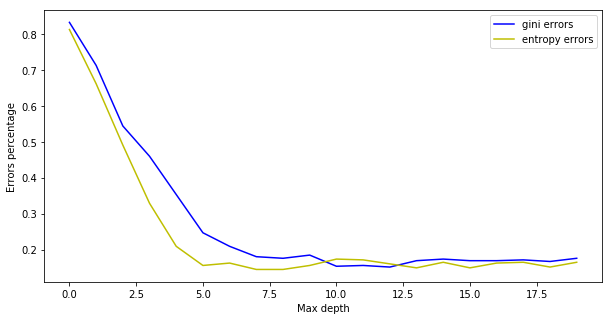

In [8]:
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
errors_gini = []
errors_entropy = []
for i in np.arange(1, 21):
    clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf_gini.fit(X_train, y_train)
    clf_entropy.fit(X_train, y_train)
    errors_gini.append(1-clf_gini.score(X_test, y_test))
    errors_entropy.append(1-clf_entropy.score(X_test, y_test))
fig, axes = plt.subplots(1, 1, sharex = True, figsize = (10,5))
axes.plot(errors_gini, 'b', label = "gini errors")
axes.plot(errors_entropy, 'y', label = "entropy errors", )
axes.legend(loc = 'upper right')
plt.xlabel('Max depth')
plt.ylabel('Errors percentage')
plt.show()

## 7)Use the function sklearn.cross_validation.cross_val_score and test it on the dataset zipcode by varying the depth of the decision tree. 

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
errors_gini = []
errors_entropy = []
depth_min_gini = 1
error_min_gini = 1
depth_min_entropy = 1
error_min_entropy = 1
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

In [10]:
for i in np.arange(1, 21):
    clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    score_gini = cross_val_score(clf_gini,digits.data, digits.target, cv=cv)
    score_entropy = cross_val_score(clf_entropy,digits.data, digits.target, cv=cv)
    errors_gini.append(1-score_gini.mean())
    errors_entropy.append(1-score_entropy.mean())
    if 1-score_gini.mean() < error_min_gini:
        depth_min_gini = i
        error_min_gini = 1-score_gini.mean()
    if 1-score_entropy.mean() < error_min_entropy:
        depth_min_entropy = i
        error_min_entropy = 1-score_entropy.mean()

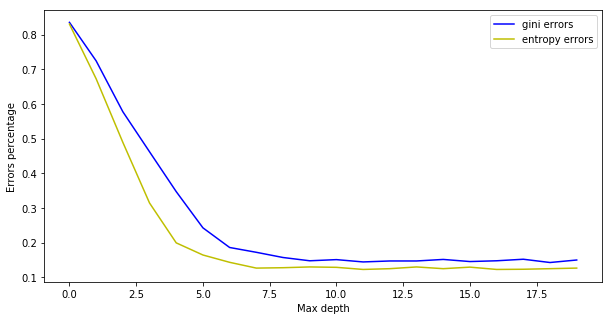

The optimal depth of the tree with gini is 19
The optimal depth of the tree with entropy is 12


In [11]:
fig, axes = plt.subplots(1, 1, sharex = True, figsize = (10,5))
axes.plot(errors_gini, 'b', label = "gini errors")
axes.plot(errors_entropy, 'y', label = "entropy errors", )
axes.legend(loc = 'upper right')
plt.xlabel('Max depth')
plt.ylabel('Errors percentage')
plt.show()
print "The optimal depth of the tree with gini is " + str(depth_min_gini)
print "The optimal depth of the tree with entropy is " + str(depth_min_entropy)

## 8)Plot the learning curve  for decision trees on the same dataset 

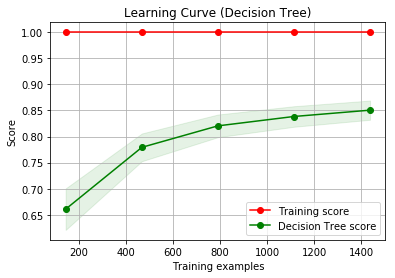

In [12]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
title = "1"
X, y = digits.data, digits.target
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth_min_gini)
clf_gini.fit(X_train, y_train)
estimator = clf_gini
plt.figure()
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
             train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
             test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Decision Tree score")
plt.legend(loc="best")
plt.show()